In [59]:
import json
import copy
from collections import defaultdict

In [60]:
with open('cities.json', 'r') as f:
    adj_list = dict(json.load(f))

In [61]:
adj_list['Arad']

[['Sibiu', 140], ['Timisoara', 118], ['Zerind', 75]]

In [62]:
for neighbour, weight in adj_list['Arad']:
    print(neighbour, weight)

Sibiu 140
Timisoara 118
Zerind 75


# AStar

In [63]:
def get_next_node(open_set, heuristic_guess):
    v = None
    min_d = float('inf')
    for node in open_set:
        if node in heuristic_guess:
            guess = heuristic_guess[node]
            if guess < min_d:
                min_d = guess
                v = node
    return v

In [64]:
def astar(adj_list, start_node, target_node, h):
    open_set = set([start_node])
    
    parents = {}
    parents[start_node] = None
    
    cheapest_paths = {v:float('inf') for v in adj_list}
    cheapest_paths[start_node] = 0
    
    heuristic_guess = {v:float('inf') for v in adj_list}
    heuristic_guess[start_node] = h(start_node)
    
    path_found = False
    while len(open_set) > 0:
        current_node = get_next_node(open_set, heuristic_guess)
        
        if current_node == target_node:
            path_found = True
            break
        
        open_set.remove(current_node)
        for (neighbour_node, weight) in adj_list[current_node]:
            new_cheapest_path = cheapest_paths[current_node] + weight
            
            if new_cheapest_path < cheapest_paths[neighbour_node]:
                parents[neighbour_node] = current_node
                cheapest_paths[neighbour_node] = new_cheapest_path
                heuristic_guess[neighbour_node] = new_cheapest_path + h(neighbour_node)
                
                if neighbour_node is not open_set:
                    open_set.add(neighbour_node)
        
    path = []
    if path_found:
        while target_node is not None:
            path.append(target_node)
            target_node = parents[target_node]
        path.reverse()
    
    return path

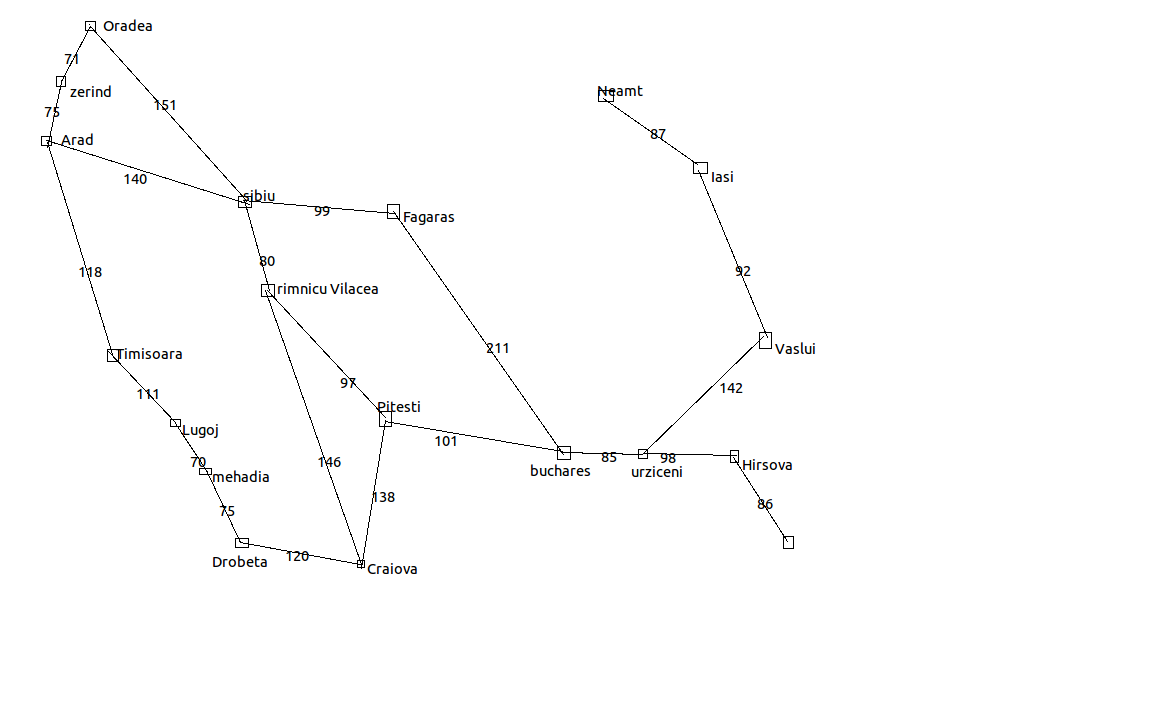

In [65]:
def h(n):
    H = {
            'Oradea': 380,
            'Zerind': 374,
            'Arad': 366,
            'Timisoara' : 329,
            'Lugoj' : 244,
            'Mehadia' : 241,
            'Drobeta' : 242,
            'Sibiu' : 253,
            'Fagaras': 176,
            'Rimnicu Vilacea' : 193,
            'Pitesti' : 100,
            'Craiova' : 160,
            'Buchares' : 0
    }
    return H[n] if n in H else 400

In [66]:
start_node = 'Buchares'
target_node = 'Oradea'
path = astar(adj_list, start_node, target_node, h)

In [67]:
path

['Buchares', 'Pitesti', 'Rimnicu Vilacea', 'Sibiu', 'Oradea']

# Lojdova slagalica

In [68]:
start = [
    [4,1,3],
    [0,2,5],
    [7,8,6]
]
# '4:1:3:0:2:5:7:8:6'
target = [
    [1,2,3],
    [4,5,6],
    [7,8,0]
]

In [34]:
def serialize(matrix):
    result = []
    for row in matrix:
        for col in row:
            result.append(str(col)) # [4,1,3,0,2,5,7,8,6]
    return ':'.join(result)
serialize(start)

'4:1:3:0:2:5:7:8:6'

In [36]:
def deserialize(state):
    splited = state.split(':') # ['4', '1', '3', '0'...]
    splited = [int(x) for x in splited]
    return [splited[:3], splited[3:6], splited[6:]]

serialized = serialize(start)
deserialize(serialized)

[[4, 1, 3], [0, 2, 5], [7, 8, 6]]

In [53]:
def get_neighbours(state):
    matrix = deserialize(state)
    blank_i, blank_j = -1, -1
    
    n = len(matrix)
    for i in range(n):
        for j in range(n):
            if matrix[i][j] == 0:
                blank_i, blank_j = i, j
                break
    
    neighbours = []
    if blank_i > 0:
        new_matrix = copy.deepcopy(matrix)
        new_matrix[blank_i][blank_j] = new_matrix[blank_i - 1][blank_j]
        new_matrix[blank_i - 1][blank_j] = 0
        neighbours.append(serialize(new_matrix))
    
    if blank_i < (n-1):
        new_matrix = copy.deepcopy(matrix)
        new_matrix[blank_i][blank_j] = new_matrix[blank_i + 1][blank_j]
        new_matrix[blank_i + 1][blank_j] = 0
        neighbours.append(serialize(new_matrix))
    
    if blank_j > 0:
        new_matrix = copy.deepcopy(matrix)
        new_matrix[blank_i][blank_j] = new_matrix[blank_i][blank_j - 1]
        new_matrix[blank_i][blank_j - 1] = 0
        neighbours.append(serialize(new_matrix))
    
    if blank_j < (n-1):
        new_matrix = copy.deepcopy(matrix)
        new_matrix[blank_i][blank_j] = new_matrix[blank_i][blank_j + 1]
        new_matrix[blank_i][blank_j + 1] = 0
        neighbours.append(serialize(new_matrix))
    
    return zip(neighbours, [1 for _ in neighbours])

In [54]:
def loyd_astar(start_node, target_node, h):
    open_set = set([start_node])
    
    parents = {}
    parents[start_node] = None
    
    cheapest_paths = defaultdict(lambda: float('inf'))
    cheapest_paths[start_node] = 0
    
    heuristic_guess = defaultdict(lambda: float('inf'))
    heuristic_guess[start_node] = h(start_node)
    
    path_found = False
    while len(open_set) > 0:
        current_node = get_next_node(open_set, heuristic_guess)
        
        if current_node == target_node:
            path_found = True
            break
        
        open_set.remove(current_node)
        for (neighbour_node, weight) in get_neighbours(current_node):
            new_cheapest_path = cheapest_paths[current_node] + weight
            
            if new_cheapest_path < cheapest_paths[neighbour_node]:
                parents[neighbour_node] = current_node
                cheapest_paths[neighbour_node] = new_cheapest_path
                heuristic_guess[neighbour_node] = new_cheapest_path + h(neighbour_node)
                
                if neighbour_node is not open_set:
                    open_set.add(neighbour_node)
        
    path = []
    if path_found:
        while target_node is not None:
            path.append(target_node)
            target_node = parents[target_node]
        path.reverse()
    
    return path

In [55]:
def loyd_h(state):
    state = deserialize(state)
    H = 0
    n = len(state)
    for i in range(n):
        for j in range(n):
            H += abs(state[i][j] % n - j) + abs(state[i][j] / n - i)    
    return H

In [56]:
path = loyd_astar(serialize(start), serialize(target), loyd_h)

In [57]:
path

['4:1:3:0:2:5:7:8:6',
 '0:1:3:4:2:5:7:8:6',
 '1:0:3:4:2:5:7:8:6',
 '1:2:3:4:0:5:7:8:6',
 '1:2:3:4:5:0:7:8:6',
 '1:2:3:4:5:6:7:8:0']

In [58]:
for step in path:
    print(deserialize(step))

[[4, 1, 3], [0, 2, 5], [7, 8, 6]]
[[0, 1, 3], [4, 2, 5], [7, 8, 6]]
[[1, 0, 3], [4, 2, 5], [7, 8, 6]]
[[1, 2, 3], [4, 0, 5], [7, 8, 6]]
[[1, 2, 3], [4, 5, 0], [7, 8, 6]]
[[1, 2, 3], [4, 5, 6], [7, 8, 0]]
